![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Interpolación - Cuarta Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

### Interpolación de Hermite
___

Hay casos en los que disponemos de más datos para interpolar o generar una función que represente esos datos. Por ejemplo, supongamos que para una partícula que se desplaza conocemos los siguientes datos: el instante $t_i$, la coordenada de la trayectoria $y_i$ y la velocidad $v_i$, para $i = 0, 1,. . . , n$. En este caso además de los valores de $f(t_i)$ conocemos también los de $f'(t_i)$ pues $v_i = f'(t_i)$.

| $t$ | $y$ | $v$
| --- | --- | ---
|$t_0$  | $y_0$ | $v_0$
| $t_1$  | $y_1$ | $v_1$
| $t_2$  | $y_2$ | $v_2$
|$t_3$| $y_3$ | $v_3$

Es evidente que **contamos con más información** para construir nuestro polinomio interpolante.
En efecto, de disponer de sólo cuatro valores asociados a nuestros puntos , pasamos a tener ocho valores.


### Interpolación de Hermite a partir de las diferencias divididas
___

Se puede armar el polinomio de Hermite a partir del método ya visto de las diferencias divididas de Newton. Analicemos un ejemplo para obtener un polinomio interpolante a partir de los puntos $x_0$, $x_1$, $x_2$, y $x_3$, para los cuales contamos con información de la función y la derivada. En la siguiente tabla se puede ver como generar las diferencias divididas:

|   $x$  | $f(x)$  | $f(x_i, x_{i+1})$   | $f(x_i, x_{i+1}, x_{i+2})$ | $f(x_i, x_{i+1}, x_{i+2}, x_{i+3})$ |...|
|:----:|--------|--------------------|---------------------------|------------------------------------|----|
| $x_0$  | $f(x_0)=y_0$ |  $f(x_0, x_0)=f'(x_0)$       | $f(x_0, x_0, x_1)=\frac{f(x_1 ,x_0)-f(x_0, x_0)}{x_1-x_0}$ | $f(x_0, x_0, x_1, x_1)=\frac{f(x_0, x_1, x_1)-f(x_0, x_0, x_1)}{x_1-x_0}$ |...|
| $x_0$  | $f(x_0)=y_0$ |  $f(x_0, x_1)=\frac{y_1-y_0}{x_1-x_0}$      | $f(x_0, x_1, x_1)=\frac{f(x_1, x_1)-f(x_1 ,x_0)}{x_1-x_0}$          |$f(x_0, x_1, x_1, x_2)=\frac{f(x_1, x_1, x_2)-f(x_0, x_1, x_1)}{x_2-x_0}$ |...|
| $x_1$  | $f(x_1)=y_1$ | $f(x_1, x_1)=f'(x_1)$   |   $f(x_1, x_1, x_2)=\frac{f(x_2, x_1)-f(x_1 ,x_1)}{x_2-x_1}$ |  $f(x_1, x_1, x_2, x_2)=\frac{f(x_1, x_2, x_2)-f(x_1, x_1, x_2)}{x_1-x_0}$|...|
| $x_1$  | $f(x_1)=y_1$ | $f(x_1 ,x_2)=\frac{y_2-y_1}{x_2-x_1}$  |$f(x_1, x_2, x_2)=\frac{f(x_2, x_2)-f(x_2 ,x_1)}{x_2-x_1}$ |  $f(x_1, x_2, x_2, x_3)=\frac{f(x_2, x_2, x_3)-f(x_1, x_2, x_2)}{x_3-x_1}$ |...|
| $x_2$  | $f(x_2)=y_2$ |  $f(x_2, x_2)=f'(x_2)$  |  $f(x_2, x_2, x_3)=\frac{f(x_3, x_2)-f(x_2 ,x_2)}{x_3-x_2}$ | $f(x_2, x_2, x_3, x_3)=\frac{f(x_2, x_3, x_3)-f(x_2, x_2, x_3)}{x_3-x_2}$    |...|
| $x_2$  | $f(x_2)=y_2$ | $f(x_2, x_3)=\frac{y_3-y_2}{x_3-x_2}$ | $f(x_2, x_3, x_3)=\frac{f(x_3, x_3)-f(x_3 ,x_2)}{x_3-x_2}$                          |                                    |...|
| $x_3$  | $f(x_3)=y_3$ |  $f(x_3, x_3)=f'(x_3)$                  |                           |                                    |...|
| $x_3$  | $f(x_3)=y_3$ |                    |                           |                                    |...|


### Interpolación de Hermite a partir de las diferencias divididas
___
Vamos a hacer un pequeño cambio de nomenclatura para que resulte más sencillo de escribir:

|   $x$  | $y$  | $F_{i,i+1}$   | $F_{i,i+1,i+2}$ | $F_{i,i+1,i+2,i+3}$ | $F_{i,i+1,i+2,i+3,i+4}$ |$F_{i,i+1,i+2,i+3,i+4,i+5}$ |$F_{i,i+1,i+2,i+3,i+4,i+5,i+6}$ |$F_{i,i+1,i+2,i+3,i+4,i+5,i+6,i+7}$ |
|:----:|--------|--------------------|---------------------------|------------------------------------|------------------------------------|------------------------------------|------------------------------------|-----------------------------------|
| $x_0$  | $y_0$ | $F_{0,0}=f'(x_0)$        |$F_{0,0,1}=\frac{F_{1,0}-F_{0,0}}{x_1-x_0}$          | $F_{0,0,1,1}=\frac{F_{0,0,1}-F_{0,1,1}}{x_1-x_0}$ |$F_{0,0,1,1,2}=\frac{F_{0,1,1,2}-F_{0,0,1,1}}{x_2-x_0}$ |$F_{0,0,1,1,2,2}=\frac{F_{0,1,1,2,2}-F_{0,0,1,1,2}}{x_2-x_0}$ | $F_{0,0,1,1,2,2,3}=\frac{F_{0,1,1,2,2,3}-F_{0,0,1,1,2,2}}{x_3-x_0}$ | $F_{0,0,1,1,2,2,3,3}=\frac{F_{0,1,1,2,2,3,3}-F_{0,0,1,1,2,2,3}}{x_3-x_0}$ |
| $x_0$  | $y_0$ | $F_{0,1}=\frac{y_1-y_0}{x_1-x_0}$        |$F_{0,1,1}=\frac{F_{1,1}-F_{0,1}}{x_1-x_0}$          | $F_{0,1,1,2}=\frac{F_{0,1,1}-F_{1,1,2}}{x_2-x_0}$ | $F_{0,1,1,2,2}=\frac{F_{1,1,2,2}-F_{0,1,1,2}}{x_2-x_0}$ |$F_{0,1,1,2,2,3}=\frac{F_{1,1,2,2,3}-F_{0,1,1,2,2}}{x_3-x_0}$ |$F_{0,1,1,2,2,3,3}=\frac{F_{1,1,2,2,3,3}-F_{0,1,1,2,2,3}}{x_3-x_0}$ | 
| $x_1$  | $y_1$ | $F_{1,2}=\frac{y_2-y_1}{x_2-x_1}$        |$F_{1,2,2}=\frac{F_{2,2}-F_{1,2}}{x_2-x_1}$          | $F_{1,1,2,2}=\frac{F_{1,2,2}-F_{1,1,2}}{x_2-x_1}$ | $F_{1,1,2,2,3}=\frac{F_{1,2,2,3}-F_{1,1,2,2}}{x_3-x_1}$ | $F_{1,1,2,2,3,3}=\frac{F_{1,2,2,3,3}-F_{1,1,2,2,3}}{x_3-x_0}$ |                  |
| $x_1$  | $y_1$ | $F_{1,2}=\frac{y_2-y_1}{x_2-x_1}$  |$F_{1,2,2}=\frac{F_{2,2}-F_{1,2}}{x_2-x_1}$   | $F_{1,2,2,3}=\frac{F_{2,2,3}-F_{1,2,2}}{x_3-x_1}$  | $F_{1,2,2,3,3}=\frac{F_{2,2,3,3}-F_{1,2,2,3}}{x_3-x_1}$ |           | 
| $x_2$  | $y_2$ |$F_{2,2}=f'(x_2)$ | $F_{1,2,3}=\frac{F_{2,3}-F_{1,2}}{x_3-x_1}$ |  $F_{2,2,3,3}=\frac{F_{2,3,3}-F_{2,2,3}}{x_3-x_2}$                   |
| $x_2$  | $y_2$ |$F_{2,3}=\frac{y_3-y_2}{x_3-x_2}$|   $F_{2,3,3}=\frac{F_{3,3}-F_{2,3}}{x_3-x_2}$                         |   |
| $x_3$  | $y_3$ |$F_{3,3}=f'(x_3)$        |
| $x_3$  | $y_3$ |


Observemos que podemos armar dos polinomios con todos los puntos aplicando de forma equivalente a la Interpolación por el Método de Newton. Si lo planteamos partiendo de $x_0$ obtenemos el polinomio de forma **Progresiva**:

$$P(x)=y_0 + y'_0(x - x_0) + F_{0,0,1}(x - x_0)(x - x_0)+ F_{0,0,1,1}(x - x_0)(x - x_0)(x - x_1) + F_{0,0,1,1,2}(x - x_0)(x - x_0)(x - x_1)(x - x_1)+F_{0,0,1,1,2,2}(x - x_0)(x - x_0)(x - x_1)(x - x_1)(x - x_2)+F_{0,0,1,1,2,2,3}(x - x_0)(x - x_0)(x - x_1)(x - x_1)(x - x_2)(x - x_2)+F_{0,0,1,1,2,2,3,3}(x - x_0)(x - x_0)(x - x_1)(x - x_1)(x - x_2)(x - x_2)(x - x_3)$$


Si partimos de $x_3$ obtenemos el polinomio de manera **Regresiva** : 

$$ P(x) = y_3 + y'_3 (x - x_3) + F_{2,3,3}(x - x_3)(x - x_3)+ F_{2,2,3,3}(x - x_3)(x - x_3)(x - x_2)+ F_{1,2,2,3,3}(x - x_3)(x - x_3)(x - x_2)(x - x_2)+ F_{1,1,2,2,3,3}(x - x_3)(x - x_3)(x - x_2)(x - x_2)(x - x_1)+F_{0,1,1,2,2,3,3}(x - x_3)(x - x_3)(x - x_2)(x - x_2)(x - x_1)(x - x_1)+F_{0,0,1,1,2,2,3,3}(x - x_3)(x - x_3)(x - x_2)(x - x_2)(x - x_1)(x - x_1)(x - x_0)$$

In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos
import matplotlib.pyplot as plt #librería para graficar

def Hermite(df,x):
        n = len(df)
        A = np.zeros([2*n,2*n+1])
        for f in range(0,2*n,2):
            A[f,0] = df['x'][f/2]
            A[f+1,0] = df['x'][f/2]
            A[f,1] = df['y'][f/2]
            A[f+1,1] = df['y'][f/2]  
            A[f,2] = df['dy'][f/2]
        for i in range(0,2*n-2,2):   
            A[i+1,2] = (A[i+2,1]-A[i+1,1])/(A[i+2,0]-A[i+1,0])
        contador=1
        for j in range(3,2*n+1):
                for i in range(0,2*n-contador-1):
                    A[i,j] = (A[i+1,j-1]-A[i,j-1])/(A[i+contador+1,0]-A[i,0])
                contador+=1
        suma=0
        prod =1
        for k in range (0,n):
            suma+=A[0,k+1]*prod
            prod*=x-A[k,0]
            
        return print('Por el método de Hermite obtenemos P(x=',x,')=',round(suma,5)), A, suma 


### Resolvamos un ejemplo numérico
___

Supongamos que tenemos la siguiente tabla y queremos calcular $P(1.45)=?$

|$i$| $x$ | $y$| $dy$
| ---| --- | ---| ---
|$0$ |1.3 | 0.6200860 | -0.5220232
|$1$| 1.6 | 0.4554022 | -0.5698959
|$2$| 1.9  | 0.2818186 | -0.5811571


In [2]:
#Cargo los datos

ejemploBurden = [[1.3, 0.6200860, -0.5220232], [1.6, 0.4554022, -0.5698959],[1.9, 0.2818186, -0.5811571]]
df = pd.DataFrame(ejemploBurden, columns = ['x', 'y', 'dy'])

xp=1.45
ejemplo=Hermite(df,xp)
DiferenciasDividasProg=pd.DataFrame(ejemplo[1])
DiferenciasDividasProg

Por el método de Hermite obtenemos P(x= 1.45 )= 0.53976


,0,1,2,3,4,5,6
0,1.3,0.620086,-0.522023,-0.089743,0.066366,0.002667,-0.002775
1,1.3,0.620086,-0.548946,-0.069833,0.067966,0.001002,0.000000
2,1.6,0.455402,-0.569896,-0.029054,0.068567,0.000000,0.000000
3,1.6,0.455402,-0.578612,-0.008484,0.000000,0.000000,0.000000
4,1.9,0.281819,-0.581157,0.000000,0.000000,0.000000,0.000000
5,1.9,0.281819,0.000000,0.000000,0.000000,0.000000,0.000000


### Interpolación con Hermite Segmentado
___
Vamos a armar segmentos de grado 3 cada dos puntos, ya que dos puntos significa que tenemos cuatro datos. Veamos un ejemplo de como armar la tabla para el primer segmente entre $x_0$ y $x_1$:

|   $x$  | $y$  | $F_{i,i+1}$   | $F_{i,i+1,i+2}$ | $F_{i,i+1,i+2,i+3}$ | 
|:----:|--------|--------------------|---------------------------|------------------------------------|
| $x_0$  | $y_0$ | $F_{0,0}=f'(x_0)$        |$F_{0,0,1}=\frac{F_{1,0}-F_{0,0}}{x_1-x_0}$          | $F_{0,0,1,1}=\frac{F_{0,0,1}-F_{0,1,1}}{x_1-x_0}$ |
| $x_0$  | $y_0$ | $F_{0,1}=\frac{y_1-y_0}{x_1-x_0}$        |$F_{0,1,1}=\frac{F_{1,1}-F_{0,1}}{x_1-x_0}$          | 
| $x_1$  | $y_1$ | $F_{1,1}=f'(x_1)$   
| $x_1$  | $y_1$ | 

De manera análoga se construye la tabla de las diferencias divididas para todos los pares de puntos y cada segmento se puede armar de la siguinte forma. Supongamos un esquema **progresivo**, el segmento $P_i(x)$ que va del punto $x_i$ hasta $x_{i+1}$ queda de la siguiente manera:

$$P_i(x)=y_i + y'_i(x - x_i) + F_{i,i,i+1}(x - x_i)(x - x_i)+ F_{i,i,i+1,i+1}(x - x_i)(x - x_i)(x - x_{i+1})$$


In [3]:
#Hermite Segmentado
def HermiteSegmentado(df,x):
    n = len(df)
    A = np.zeros([2*n,5])
    for f in range(0,2*n,2):
        A[f,0] = df['x'][f/2]
        A[f+1,0] = df['x'][f/2]
        A[f,1] = df['y'][f/2]
        A[f+1,1] = df['y'][f/2]  
        A[f,2] = df['dy'][f/2]
    for i in range(0,2*n-2,2):   
        A[i+1,2] = (A[i+2,1]-A[i+1,1])/(A[i+2,0]-A[i+1,0])
    contador=1
    for j in range(3,5):
                for i in range(0,2*n-contador-1):
                    A[i,j] = (A[i+1,j-1]-A[i,j-1])/(A[i+contador+1,0]-A[i,0])
                contador+=1  
    a,b,c,d = [],[],[],[]
    for i in range(0,2*n-2,2):
        aux_a = A[i,1] 
        a.append(aux_a)
        aux_b = A[i,2] 
        b.append(aux_b)
        aux_c = A[i,3] 
        c.append(aux_c)
        aux_d = A[i,4] 
        d.append(aux_d)
        
    # Evalúo x en el segmento que corresponde
    hi =[]
    for k in range(0,n-1):
        if (df['x'][k] == x):
            hi = df['y'][k]
        elif (x >= df['x'][k] and x < df['x'][k+1]):
             hi = a[k] + b[k]*(x - df['x'][k]) + c[k]*(x - df['x'][k])**2 + d[k]*(x - df['x'][k+1])*(x - df['x'][k])**2
            
    return print('Por el método de Hermite Segmentado obtenemos P(x=',x,')=',np.round(hi,5)),A,a,b,c,d

In [4]:
ejemplo2=HermiteSegmentado(df,xp)
DiferenciasDividasProgSegmentado=pd.DataFrame(ejemplo2[1])
DiferenciasDividasProgSegmentado

Por el método de Hermite Segmentado obtenemos P(x= 1.45 )= 0.53954


,0,1,2,3,4
0,1.3,0.620086,-0.522023,-0.089743,0.066366
1,1.3,0.620086,-0.548946,-0.069833,0.067966
2,1.6,0.455402,-0.569896,-0.029054,0.068567
3,1.6,0.455402,-0.578612,-0.008484,0.000000
4,1.9,0.281819,-0.581157,0.000000,0.000000
5,1.9,0.281819,0.000000,0.000000,0.000000


In [5]:
def HermitePlot(df,x):
        n = len(df)
        A = np.zeros([2*n,2*n+1])
        for f in range(0,2*n,2):
            A[f,0] = df['x'][f/2]
            A[f+1,0] = df['x'][f/2]
            A[f,1] = df['y'][f/2]
            A[f+1,1] = df['y'][f/2]  
            A[f,2] = df['dy'][f/2]
        for i in range(0,2*n-2,2):   
            A[i+1,2] = (A[i+2,1]-A[i+1,1])/(A[i+2,0]-A[i+1,0])
        contador=1
        for j in range(3,2*n+1):
                for i in range(0,2*n-contador-1):
                    A[i,j] = (A[i+1,j-1]-A[i,j-1])/(A[i+contador+1,0]-A[i,0])
                contador+=1
        suma=0
        prod =1
        for k in range (0,n):
            suma+=A[0,k+1]*prod
            prod*=x-A[k,0]
         
        return suma  

def HermiteSegmentadoPlot(df,x):
    n = len(df)
    A = np.zeros([2*n,5])
    for f in range(0,2*n,2):
        A[f,0] = df['x'][f/2]
        A[f+1,0] = df['x'][f/2]
        A[f,1] = df['y'][f/2]
        A[f+1,1] = df['y'][f/2]  
        A[f,2] = df['dy'][f/2]
    for i in range(0,2*n-2,2):   
        A[i+1,2] = (A[i+2,1]-A[i+1,1])/(A[i+2,0]-A[i+1,0])
    contador=1
    for j in range(3,5):
                for i in range(0,2*n-contador-1):
                    A[i,j] = (A[i+1,j-1]-A[i,j-1])/(A[i+contador+1,0]-A[i,0])
                contador+=1  
    a,b,c,d = [],[],[],[]
    for i in range(0,2*n-2,2):
        aux_a = A[i,1] 
        a.append(aux_a)
        aux_b = A[i,2] 
        b.append(aux_b)
        aux_c = A[i,3] 
        c.append(aux_c)
        aux_d = A[i,4] 
        d.append(aux_d)
        
    # Evalúo x en el segmento que corresponde
    hi =[]
    for k in range(0,n-1):
        if (df['x'][k] == x):
            hi = df['y'][k]
        elif (x >= df['x'][k] and x < df['x'][k+1]):
            hi = a[k] + b[k]*(x - df['x'][k]) + c[k]*(x - df['x'][k])**2 + d[k]*(x - df['x'][k+1])*(x - df['x'][k])**2
            
    return hi

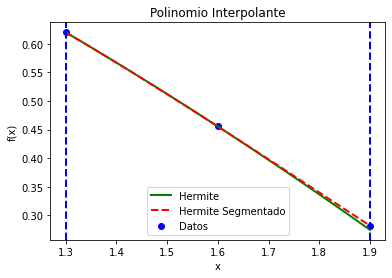

In [6]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('f(x)')

ejex = np.linspace(min(df['x']), max(df['x']),num=1000)
Nx=len(ejex)
y_np=np.zeros(Nx)
y_hs=np.zeros(Nx,dtype='object')

for i in range(0,Nx):
    y_hs[i] = HermiteSegmentadoPlot(df,ejex[i]);

y_hs=pd.to_numeric(y_hs,errors='coerce') 

for i in range(0,Nx):
    y_np[i] = HermitePlot(df,ejex[i]);
    
plt.plot(ejex, y_np, linewidth=2, color = 'green')
plt.plot(ejex, y_hs, linewidth=2, color = 'red',linestyle='dashed')
plt.scatter(df['x'], df['y'], color = 'blue')
plt.legend(['Hermite','Hermite Segmentado','Datos'],fontsize=10)
plt.axvline(min(df['x']), linewidth=2, color='blue',linestyle='dashed')
plt.axvline(max(df['x']), linewidth=2, color='blue',linestyle='dashed')
plt.title('Polinomio Interpolante');

![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Gracias por su atención
***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*